In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import and_ # import and_ method
import datetime as dt
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [30]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [31]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [32]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [33]:
# Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement

In [34]:
# Assign the station class to a variable called `Station`
Station = Base.classes.station

In [35]:
# Create a session
session = Session(engine)

In [36]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [37]:
# Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [38]:
# Choosing start date 2014-02-28 to end date 2014-03-10
session.query(Measurement.date).filter(and_(Measurement.date >= '2014-02-28', Measurement.date <= '2014-03-10')).order_by(Measurement.date).all()

[('2014-02-28'),
 ('2014-02-28'),
 ('2014-02-28'),
 ('2014-02-28'),
 ('2014-02-28'),
 ('2014-02-28'),
 ('2014-02-28'),
 ('2014-02-28'),
 ('2014-03-01'),
 ('2014-03-01'),
 ('2014-03-01'),
 ('2014-03-01'),
 ('2014-03-01'),
 ('2014-03-01'),
 ('2014-03-01'),
 ('2014-03-02'),
 ('2014-03-02'),
 ('2014-03-02'),
 ('2014-03-02'),
 ('2014-03-02'),
 ('2014-03-02'),
 ('2014-03-03'),
 ('2014-03-03'),
 ('2014-03-03'),
 ('2014-03-03'),
 ('2014-03-03'),
 ('2014-03-03'),
 ('2014-03-03'),
 ('2014-03-03'),
 ('2014-03-04'),
 ('2014-03-04'),
 ('2014-03-04'),
 ('2014-03-04'),
 ('2014-03-04'),
 ('2014-03-04'),
 ('2014-03-04'),
 ('2014-03-04'),
 ('2014-03-05'),
 ('2014-03-05'),
 ('2014-03-05'),
 ('2014-03-05'),
 ('2014-03-05'),
 ('2014-03-05'),
 ('2014-03-05'),
 ('2014-03-05'),
 ('2014-03-06'),
 ('2014-03-06'),
 ('2014-03-06'),
 ('2014-03-06'),
 ('2014-03-06'),
 ('2014-03-06'),
 ('2014-03-06'),
 ('2014-03-06'),
 ('2014-03-07'),
 ('2014-03-07'),
 ('2014-03-07'),
 ('2014-03-07'),
 ('2014-03-07'),
 ('2014-03-07'

In [39]:
# convert lastest_date to date time object
latest_date = datetime.strptime(str(latest_date[0]), '%Y-%m-%d').date()
latest_date

datetime.date(2017, 8, 23)

In [40]:
# date 1 year ago from latest_date
year_ago = latest_date - dt.timedelta(days=365)

In [41]:
# convert year ago to string
year_ago_str = year_ago.strftime("%Y-%m-%d")

In [42]:
# get all year ago results
year_ago_measurement = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= year_ago_str).order_by(Measurement.date).all()
year_ago_measurement

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [43]:
# load query into pandas data frame
df = pd.DataFrame(year_ago_measurement, columns=['date', 'prcp'])
df.head(5)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [44]:
df = df.dropna()
df.head(5)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


In [45]:
df.set_index('date', inplace=True)
df.head(5)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


In [46]:
df = df.sort_values(by=['date'], ascending=True)
df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


In [47]:
new_df = df.groupby(pd.to_datetime(df.index).strftime('%Y-%m'))['prcp'].mean()
new_df.head(5)

2016-08    0.392642
2016-09    0.285549
2016-10    0.121620
2016-11    0.120234
2016-12    0.199494
Name: prcp, dtype: float64

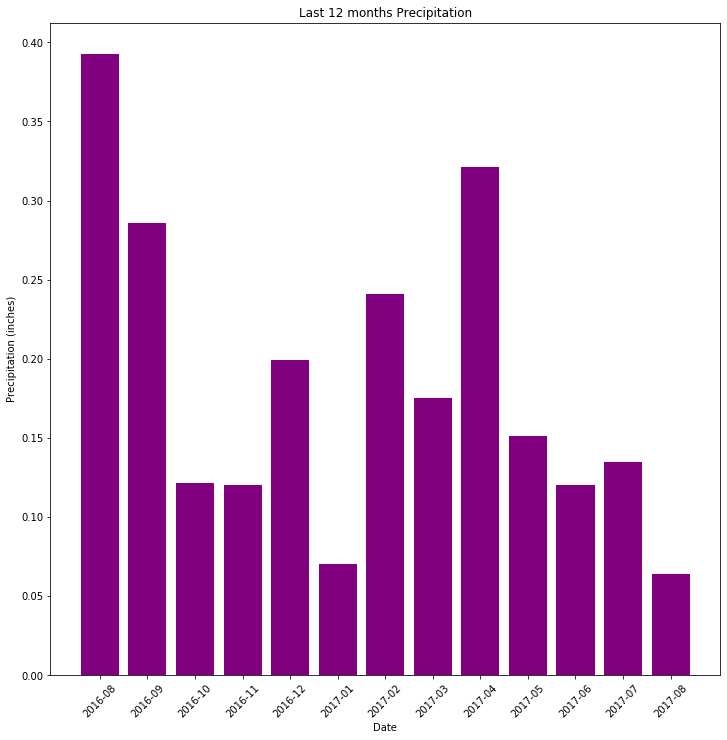

In [48]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(new_df.index,
        new_df,
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Last 12 months Precipitation")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [49]:
new_df.describe()

count    13.000000
mean      0.184412
std       0.099626
min       0.063951
25%       0.120234
50%       0.151317
75%       0.241111
max       0.392642
Name: prcp, dtype: float64

In [55]:
total_number_stations = session.query(Station.station).count()

In [57]:
print(f"Total number of stations: {total_number_stations}")

Total number of stations: 9


In [58]:
stations_observation_count = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by((func.count(Measurement.id)).desc()).all()
stations_observation_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
station_highest_observation = stations_observation_count[0].station
print(f"The station with the highest number of observations is {station_highest_observation}")

The station with the highest number of observations is USC00519281


In [60]:
# get a year ago results
year_ago_measurement = session.query(Measurement.station,Measurement.date,Measurement.tobs).filter(Measurement.date >= year_ago_str).order_by(Measurement.date).all()
year_ago_measurement

[('USC00519397', '2016-08-23', 81.0),
 ('USC00513117', '2016-08-23', 76.0),
 ('USC00514830', '2016-08-23', 80.0),
 ('USC00517948', '2016-08-23', 80.0),
 ('USC00519523', '2016-08-23', 80.0),
 ('USC00519281', '2016-08-23', 77.0),
 ('USC00516128', '2016-08-23', 74.0),
 ('USC00519397', '2016-08-24', 79.0),
 ('USC00513117', '2016-08-24', 76.0),
 ('USC00514830', '2016-08-24', 80.0),
 ('USC00517948', '2016-08-24', 78.0),
 ('USC00519523', '2016-08-24', 79.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00516128', '2016-08-24', 74.0),
 ('USC00519397', '2016-08-25', 80.0),
 ('USC00513117', '2016-08-25', 77.0),
 ('USC00514830', '2016-08-25', 81.0),
 ('USC00517948', '2016-08-25', 81.0),
 ('USC00519523', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00516128', '2016-08-25', 77.0),
 ('USC00519397', '2016-08-26', 79.0),
 ('USC00513117', '2016-08-26', 78.0),
 ('USC00514830', '2016-08-26', 81.0),
 ('USC00517948', '2016-08-26', 81.0),
 ('USC00519523', '2016-08-26', 84.0),
 ('USC005192

In [61]:
# load query into pandas data frame
df = pd.DataFrame(year_ago_measurement, columns=['station', 'date', 'tobs'])
df.head(5)

,station,date,tobs
0,USC00519397,2016-08-23,81.0
1,USC00513117,2016-08-23,76.0
2,USC00514830,2016-08-23,80.0
3,USC00517948,2016-08-23,80.0
4,USC00519523,2016-08-23,80.0


In [62]:
df = df.dropna()
df.head(5)

,station,date,tobs
0,USC00519397,2016-08-23,81.0
1,USC00513117,2016-08-23,76.0
2,USC00514830,2016-08-23,80.0
3,USC00517948,2016-08-23,80.0
4,USC00519523,2016-08-23,80.0


In [63]:
df = df.loc[df['station'] == station_highest_observation]
df.head(5)

,station,date,tobs
5,USC00519281,2016-08-23,77.0
12,USC00519281,2016-08-24,77.0
19,USC00519281,2016-08-25,80.0
26,USC00519281,2016-08-26,80.0
31,USC00519281,2016-08-27,75.0


In [64]:
df.set_index('date', inplace=True)
df.head(5)

,station,tobs
date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0


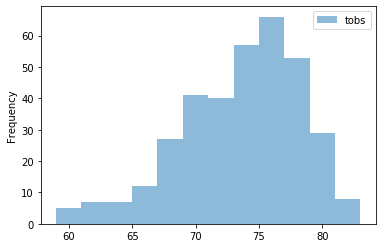

In [65]:
ax = df.plot.hist(bins=12, alpha=0.5)